# character based model applied in amazon_google dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
amazon_train = pd.read_csv("amazon_train.tsv", sep="\t")
amazon_train

,idx,text_left,text_right,label
0,0,microsoft visio standard 2007 version upgrade ...,adobe cs3 design standard upgrade 413.99,0
1,1,microsoft mappoint 2006 with gps microsoft 349.0,microsoft student with encarta premium 2008 co...,0
2,2,adobe after effects professional 7.0 adobe 999.0,adobe flash cs3 professional ( mac ) 699.0,0
3,3,motu digital performer 5 digital audio softwar...,motu digital performer dp5 software music prod...,1
4,4,illustrator cs3 13 mac ed 1u adobe-education-b...,adobe illustrator cs3 for mac academic adobe-e...,1
...,...,...,...,...
6869,6869,microsoft visual studio team suite 2005 with m...,f1q-00302 microsoft visual studio 2005 profess...,0
6870,6870,microsoft word 2004 upgrade ( mac ) microsoft ...,microsoft b21-00806 ae mappoint 2006 cd 50.39,0
6871,6871,adobe after effects professional 7.0 adobe 999.0,15510669dm adobe after effects cs3 professiona...,0
6872,6872,system care professional avanquest 49.95,microsoft office and windows training professi...,0


In [5]:
train_left=amazon_train['text_left']
train_right=amazon_train['text_right']

In [6]:
length=len(train_left)

In [7]:
# build a function to calculate Levenshtein minimal-editing distance
def charDistance(s1,s2):
    # get the length of the strings
    m = len(s1)
    n = len(s2)
    # if some of them are empty, return the longer length of them
    if (m==0|n==0):
        return max(m,n)
    # create an empty matrix to store the calculation result
    A = np.zeros((m+1,n+1))
    # initialize the first row and column
    for i in range(0,m+1):
        A[i][0]=i
    for j in range(1,n+1):
        A[0][j]=j
    # calculate the distance column by column
    for j in range(1,n+1):
        for i in range(1,m+1):
            if (s1[i-1]==s2[j-1]):
                d=0
            else: d=1
            A[i][j]=min(A[i-1][j]+1,A[i][j-1]+1,A[i-1][j-1]+d)
    # return the final result
    return A[m][n]

In [8]:
dist_train=[]
for i in range(length):
    d=charDistance(train_left[i],train_right[i])
    dist_train.append(d)
# dist_train

In [9]:
real_train=amazon_train['label']

In [10]:
is_same=[]
is_diff=[]
for i in range(length):
    if real_train[i]==1:
        is_same.append(dist_train[i])
    else:
        is_diff.append(dist_train[i])

In [11]:
print(np.mean(is_same))
print(np.mean(is_diff))

34.62804005722461
41.132955465587045


In [12]:
print(max(is_same))
print(max(is_diff))

162.0
144.0


In [13]:
set_same=set(is_same)
set_diff=set(is_diff)

In [14]:
def countnum(A,a):
    count=0
    for i in range(len(A)):
        if(A[i]==a):
            count=count+1
    return count

In [15]:
y_same=[]
for i in set_same:
    y_same.append(countnum(is_same,i))

In [16]:
y_diff=[]
for i in set_diff:
    y_diff.append(countnum(is_diff,i))

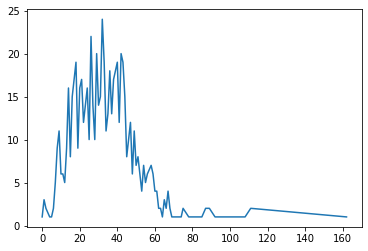

In [17]:
import matplotlib.pyplot as plt
plt.plot(list(set_same),y_same)

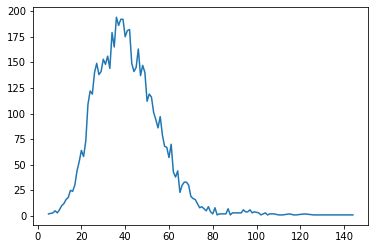

In [18]:
plt.plot(list(set_diff),y_diff)

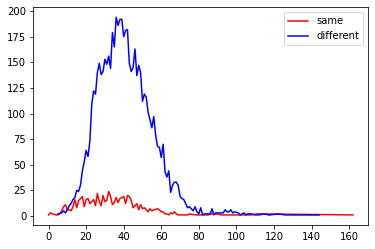

In [19]:
plt.plot(list(set_same),y_same,color='r',label='same')
plt.plot(list(set_diff),y_diff,color='b',label='different')
plt.legend()

In [31]:
threshold=range(0,40,1)

In [21]:
amazon_test = pd.read_csv("amazon_test.tsv", sep="\t")
amazon_test

,idx,text_left,text_right,label
0,0,microsoft visual studio test agent 2005 cd 1 p...,individual software professor teaches microsof...,0
1,1,adobe dreamweaver cs3 [ mac ] adobe 399.0,adobe cs3 web premium 1659.99,0
2,2,instant immersion spanish 2.0 topics entertain...,instant immers japanese dlx 2 . 36.11,0
3,3,i transfer dvds 2 ipod edition ( win/mac ) me-...,ghost recon gold edition ( dvd-rom ) 20.95,0
4,4,adobe flash pro cs3 upgrade [ mac ] adobe 199.0,adobe illustrator cs3 ( mac ) 599.0,0
...,...,...,...,...
2288,2288,instant immersion german audio topics entertai...,instant immers french dlx 2 27.57,0
2289,2289,adobe flash pro cs3 [ mac ] adobe 699.0,38039295dm adobe flash cs3 professional v. 9 m...,0
2290,2290,let 's learn about time & date selectsoft publ...,it 's about time products learn the switch to ...,0
2291,2291,quicken legal business pro 2007 nolo press 79.99,quickbooks ( r ) pro 2007 179.99,0


In [22]:
test_left=amazon_test['text_left']
test_right=amazon_test['text_right']

In [23]:
length_test=len(test_left)

In [24]:
dist_test=[]
for i in range(length_test):
    d=charDistance(test_left[i],test_right[i])
    dist_test.append(d)

In [25]:
test_label=amazon_test['label']

In [32]:
accuracy=[]
for i in range(len(threshold)):
    predict=[]
    for j in range(len(dist_test)):
        if dist_test[j]<=threshold[i]:
            predict.append(1)
        else:
            predict.append(0)
    count=0
    for k in range(len(dist_test)):
        if predict[k]==test_label[k]:
            count=count+1
    a=count/len(test_label)
    accuracy.append(a)  

In [33]:
accuracy

[0.8983863933711296,
 0.8983863933711296,
 0.8983863933711296,
 0.8983863933711296,
 0.8988225032708242,
 0.8992586131705189,
 0.8992586131705189,
 0.8992586131705189,
 0.8992586131705189,
 0.8992586131705189,
 0.8992586131705189,
 0.8983863933711296,
 0.8966419537723507,
 0.8957697339729612,
 0.8953336240732664,
 0.8948975141735718,
 0.8948975141735718,
 0.8909725250763192,
 0.8853030963802878,
 0.8805058874836459,
 0.8752725686873092,
 0.8687309201918884,
 0.8604448320976886,
 0.8512865242040994,
 0.8368948975141736,
 0.8242477104230266,
 0.8089838639337112,
 0.7841255996511121,
 0.7706061927605756,
 0.7488006977758395,
 0.729175752289577,
 0.7091146969036197,
 0.688181421718273,
 0.6681203663323158,
 0.6423898822503271,
 0.6214566070649804,
 0.5939816833842129,
 0.5660706498037505,
 0.5390318360226777,
 0.5137374618403838]

In [28]:
max(accuracy)

0.8992586131705189

In [34]:
amazon_dev = pd.read_csv("amazon_dev.tsv", sep="\t")
amazon_dev

,idx,text_left,text_right,label
0,0,adobe creative suite cs3 production premium up...,19600061dm adobe creative suite 3 production p...,0
1,1,m-audio pro tools m-powered 7.3 m-audio compat...,make finale 2007 software music production sof...,0
2,2,apple . mac 4.0 online service family pack app...,apple iwork '06 family pack software apple & m...,0
3,3,punch ! master landscape & home design punch !...,punch software 41100 punch ! home design archi...,0
4,4,quickbooks premier non-profit edition 2005 int...,quickbooks ( r ) premier : accountant edition ...,0
...,...,...,...,...
2288,2288,math success deluxe 2007 topics entertainment ...,math success ( tm ) deluxe 2007 49.99,0
2289,2289,adobe cs3 design standard macosx dvd adobe 399.0,adobe creative suite 3 ( cs3 ) design premium ...,0
2290,2290,acrobat professional 8 ( windows ) adobe 273.0,adobe cs3 flash professional academic 239.99,0
2291,2291,mavis beacon typing 17 deluxe by broderbund en...,encore software 10072 mavis beacon typing 17 d...,1


In [44]:
dev_left=amazon_dev['text_left']
dev_right=amazon_dev['text_right']

In [45]:
length_dev=len(dev_left)
threshold=9

In [46]:
result_dev=[]
for i in range(length_dev):
    d=charDistance(test_left[i],test_right[i])
    if d<threshold:
        result_dev.append(1)
    else:
        result_dev.append(0)

In [41]:
dev_label=amazon_dev['label']

In [47]:
accuracy=0
for i in range(length_dev):
    if result_dev[i]==dev_label[i]:
        accuracy+=1
accuracy/=length_test

In [48]:
accuracy

0.902311382468382